In [36]:
import pandas as pd
import scipy as sp
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

### Data Sources 

The data was obtained during an interactive experiment with [openBCI Cylon board](https://shop.openbci.com/collections/frontpage/products/cyton-biosensing-board-8-channel?variant=38958638542) and GUI version 2. By the time of the experiment openBCI did not include OSC netwroking for their brainwaves classifications and hance we had to do that with the help of custom software. The data was recorded in RAW EEG format, all the signals were combined and classified using [mne python library](https://www.martinos.org/mne/stable/index.html), Matlab, [Wizzard Statistics](http://www.wizardmac.com/), SPSS and [Dataiku](https://www.dataiku.com/). For cleaning, exploration and data(format) transformations.   

In [2]:
dQuestinnair = pd.read_csv('/home/vagrant/notebooks/data/Experiment.csv')
dTutorial = pd.read_csv('/home/vagrant/notebooks/data/all_tutorial.csv')
dRelax = pd.read_csv('/home/vagrant/notebooks/data/all_Relax_.csv')
dConcent = pd.read_csv('/home/vagrant/notebooks/data/all_ConcentrationAB.csv')


### Descriptive Statistics 

Each data sets include users' alpha and beta bandwaves after data cleaning and classification. No raw data for privacy reasons is presented in this notebook. 

All observations in different datasets. Uncomment to see summary.

In [3]:
# dTutorial.head()
# dConcent.head()
dRelax.head()
# dQuestinnair.head()

,VAR00001,VAR00002,VAR00003,VAR00004,VAR00005,VAR00006,VAR00007,VAR00008,VAR00010,VAR00011,...,LearnersAlpha,LearnersBeta,(LearnersAlpha) / 5,(LearnersBeta) / 5,NonLearnersAlpha,NonLearnersBeta,(NonLearnersAlpha) / 4,(NonLearnersBeta) / 4,(NonLearnersAlpha) / 4 / (NonLearnersBeta) / 4,(LearnersAlpha) / 5 / (LearnersBeta) / 5
0,0.384469,0.336701,0.350860,0.352769,0.240459,0.337695,0.364995,0.346983,0.360552,0.386900,...,1.709548,1.810842,0.341910,0.362168,1.217790,1.417071,0.304447,0.354268,0.859371,0.944062
1,0.383699,0.334740,0.350867,0.353258,0.239852,0.335620,0.365172,0.347027,0.361102,0.386133,...,1.708576,1.805471,0.341715,0.361094,1.217338,1.414858,0.304335,0.353714,0.860396,0.946333
2,0.382957,0.333083,0.350887,0.353620,0.239335,0.334157,0.365255,0.346949,0.361885,0.385521,...,1.707897,1.801372,0.341579,0.360274,1.217317,1.413292,0.304329,0.353323,0.861335,0.948109
3,0.382263,0.331924,0.350922,0.353851,0.238908,0.333295,0.365238,0.346816,0.362750,0.385071,...,1.707357,1.798759,0.341471,0.359752,1.217584,1.412340,0.304396,0.353085,0.862104,0.949186
4,0.381625,0.331188,0.350975,0.353945,0.238577,0.332886,0.365125,0.346752,0.363661,0.384795,...,1.706911,1.797441,0.341382,0.359488,1.218065,1.411838,0.304516,0.352960,0.862751,0.949634


In [4]:
# Selecting the all observed timeframe for users only. Excluding combined/group scores.
dr1 = dRelax.ix[:,:20]
dc1 = dConcent.ix[:,:20]
ct1 = dTutorial.ix[:,:20]



# Descriptive Stats for each level and user
ct1.describe()
dr1.describe()
ct1.describe()

,user 2 alpha,user 2 beta,user 6 alpha,user 6 beta,user 7 alpha,user 7 beta,user 8 alpha,user 8 beta,user 9 alpha,user 9 beta,user 12 alpha,user 12 beta,user 13 alpha,user 13 beta,user 16 alpha,user 16 beta,user 17 alpha,user 17 beta,SumBeta,SumAlpha
count,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000
mean,0.422130,0.287366,0.350194,0.351441,0.351808,0.374647,0.333043,0.403010,0.350389,0.353958,0.360084,0.354274,0.364645,0.354274,0.353526,0.355939,0.344632,0.348019,3.182929,3.230452
std,0.094317,0.029269,0.058421,0.035064,0.008093,0.039878,0.081534,0.140130,0.076132,0.018255,0.060687,0.017040,0.116256,0.017040,0.081485,0.028000,0.043003,0.012005,0.184497,0.190987
min,0.269448,0.234130,0.220668,0.269078,0.318956,0.272273,0.162359,0.286639,0.000000,0.290429,0.225940,0.307380,0.152452,0.307380,0.124802,0.237884,0.241509,0.306730,2.955988,2.713474
25%,0.371167,0.253455,0.308944,0.335391,0.347469,0.349391,0.276964,0.339341,0.301187,0.345094,0.318610,0.345030,0.292005,0.345030,0.320505,0.342649,0.319232,0.342221,3.078702,3.119745
50%,0.420334,0.302027,0.344793,0.346657,0.351861,0.369967,0.324079,0.355656,0.337124,0.357006,0.349201,0.351482,0.343570,0.351482,0.348585,0.353853,0.342272,0.349068,3.123521,3.231279
75%,0.451187,0.310546,0.387163,0.367153,0.355295,0.404559,0.373278,0.374689,0.402912,0.364621,0.391768,0.358586,0.400452,0.358586,0.380726,0.374790,0.370216,0.355436,3.181428,3.322371
max,0.892093,0.335075,0.534613,0.503330,0.382440,0.465042,0.560302,0.873689,0.602206,0.409991,0.587865,0.430900,0.764208,0.430900,0.688723,0.432521,0.490689,0.377790,3.786777,3.901741


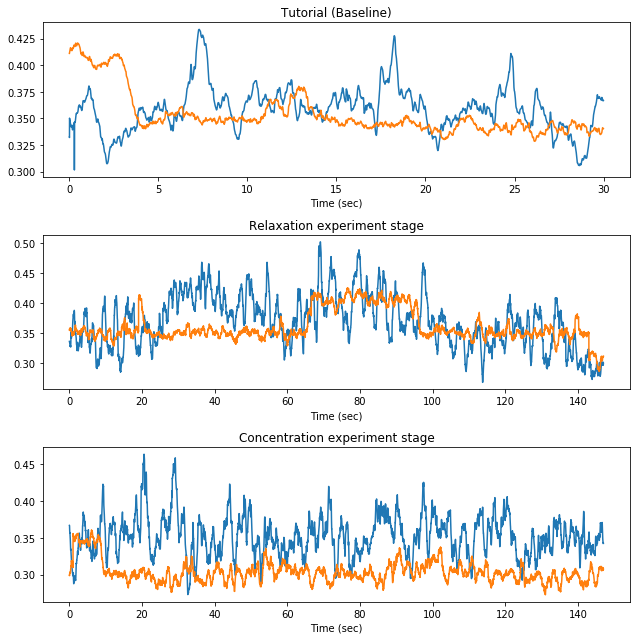

In [5]:
tt_sec = np.arange(len(ct1['SumAlpha'])) / 250.0
tee_sec = np.arange(len(dr1['Alpha'])) / 250.0
te_sec = np.arange(len(dc1['Sum Alpha'])) / 250.0

plt.figure(figsize=(9,9))

plt.subplot(3,1,1)
plt.title("Tutorial (Baseline)")
plt.plot(tt_sec, ct1['SumAlpha']/9)
plt.plot(tt_sec, ct1['SumBeta']/9)
plt.xlabel("Time (sec)")     

plt.subplot(3,1,2)
plt.title("Relaxation experiment stage")
plt.plot(tee_sec, dr1['Alpha'])
plt.plot(tee_sec, dr1['Beta'])
plt.xlabel("Time (sec)")       

plt.subplot(3,1,3)
plt.title("Concentration experiment stage")
plt.plot(te_sec, dc1['Sum Alpha']/9)
plt.plot(te_sec, dc1['Sum Beta']/9)
plt.xlabel("Time (sec)")       

plt.tight_layout()
plt.show();

### Tutorial stage.

During the tutorial stage, we explained first time users what signals are recorded, brainwaves is and what BCI interaction looks like. During this first-time interaction we observe the brain activities and considered them a baseline for our experiment.

In [6]:
ct1.describe()

,user 2 alpha,user 2 beta,user 6 alpha,user 6 beta,user 7 alpha,user 7 beta,user 8 alpha,user 8 beta,user 9 alpha,user 9 beta,user 12 alpha,user 12 beta,user 13 alpha,user 13 beta,user 16 alpha,user 16 beta,user 17 alpha,user 17 beta,SumBeta,SumAlpha
count,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000
mean,0.422130,0.287366,0.350194,0.351441,0.351808,0.374647,0.333043,0.403010,0.350389,0.353958,0.360084,0.354274,0.364645,0.354274,0.353526,0.355939,0.344632,0.348019,3.182929,3.230452
std,0.094317,0.029269,0.058421,0.035064,0.008093,0.039878,0.081534,0.140130,0.076132,0.018255,0.060687,0.017040,0.116256,0.017040,0.081485,0.028000,0.043003,0.012005,0.184497,0.190987
min,0.269448,0.234130,0.220668,0.269078,0.318956,0.272273,0.162359,0.286639,0.000000,0.290429,0.225940,0.307380,0.152452,0.307380,0.124802,0.237884,0.241509,0.306730,2.955988,2.713474
25%,0.371167,0.253455,0.308944,0.335391,0.347469,0.349391,0.276964,0.339341,0.301187,0.345094,0.318610,0.345030,0.292005,0.345030,0.320505,0.342649,0.319232,0.342221,3.078702,3.119745
50%,0.420334,0.302027,0.344793,0.346657,0.351861,0.369967,0.324079,0.355656,0.337124,0.357006,0.349201,0.351482,0.343570,0.351482,0.348585,0.353853,0.342272,0.349068,3.123521,3.231279
75%,0.451187,0.310546,0.387163,0.367153,0.355295,0.404559,0.373278,0.374689,0.402912,0.364621,0.391768,0.358586,0.400452,0.358586,0.380726,0.374790,0.370216,0.355436,3.181428,3.322371
max,0.892093,0.335075,0.534613,0.503330,0.382440,0.465042,0.560302,0.873689,0.602206,0.409991,0.587865,0.430900,0.764208,0.430900,0.688723,0.432521,0.490689,0.377790,3.786777,3.901741


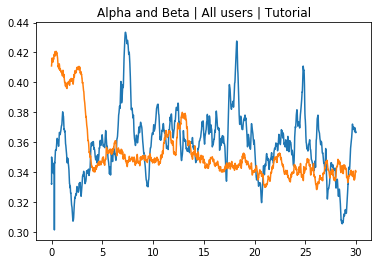

In [7]:
tt_sec = np.arange(len(ct1['SumAlpha'])) / 250.0

totalTutorialAlpha = ct1['SumAlpha' ] / 9
totalTutorialBeta = ct1['SumBeta'] / 9
plt.plot(tt_sec, totalTutorialAlpha)
plt.plot(tt_sec, totalTutorialBeta)
plt.title("Alpha and Beta | All users | Tutorial")
plt.show()

# plt.plot(ct1['SumAlpha'])
# plt.plot(ct1['SumBeta'])

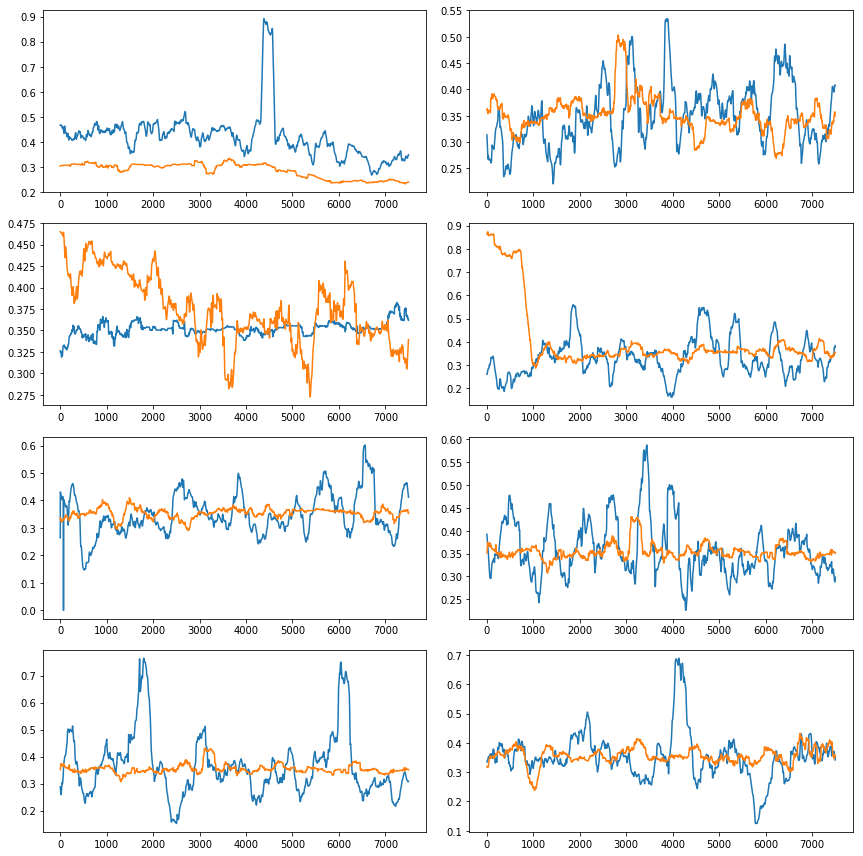

In [8]:
plt.figure(figsize=(12,12))

plt.subplot(4,2,1)
plt.plot(ct1['user 2 alpha'])
plt.plot(ct1['user 2 beta'])
ct_1_am = ct1['user 2 alpha'].mean()
ct_1_bm = ct1['user 2 beta'].mean()

plt.subplot(4,2,2)
plt.plot(ct1['user 6 alpha'])
plt.plot(ct1['user 6 beta'])
ct_2_am = ct1['user 6 alpha'].mean()
ct_2_bm = ct1['user 6 beta'].mean()

plt.subplot(4,2,3)
plt.plot(ct1['user 7 alpha'])
plt.plot(ct1['user 7 beta'])
ct_3_am = ct1['user 7 alpha'].mean()
ct_3_bm = ct1['user 7 beta'].mean()

plt.subplot(4,2,4)
plt.plot(ct1['user 8 alpha'])
plt.plot(ct1['user 8 beta'])
ct_4_am = ct1['user 8 alpha'].mean()
ct_4_bm = ct1['user 8 beta'].mean()

plt.subplot(4,2,5)
plt.plot(ct1['user 9 alpha'])
plt.plot(ct1['user 9 beta'])
ct_5_am = ct1['user 9 alpha'].mean()
ct_5_bm = ct1['user 9 beta'].mean()

plt.subplot(4,2,6)
plt.plot(ct1['user 12 alpha'])
plt.plot(ct1['user 12 beta'])
ct_6_am = ct1['user 12 alpha'].mean()
ct_6_bm = ct1['user 12 beta'].mean()

plt.subplot(4,2,7)
plt.plot(ct1['user 13 alpha'])
plt.plot(ct1['user 13 beta'])
ct_7_am = ct1['user 13 alpha'].mean()
ct_7_bm = ct1['user 13 beta'].mean()

plt.subplot(4,2,8)
plt.plot(ct1['user 16 alpha'])
plt.plot(ct1['user 16 beta'])
ct_8_am = ct1['user 16 alpha'].mean()
ct_8_bm = ct1['user 16 beta'].mean()

# plt.subplot(5,2,9)
# plt.plot(ct1['user 17 alpha'])
# plt.plot(ct1['user 17 beta'])

plt.tight_layout()
plt.show();


### Concentration Stage

In [9]:
dc1.describe()

,user 2 alpha,user 2 beta,user 6 alpha,user 6 beta,user 7 alpha,user 7 beta,user 8 alpha,user 8 beta,user 9 alpha,user 9 beta,user 12 alpha,user 12 beta,user 13 alpha,user 13 beta,user 16 alpha,user 16 beta,user 17 alpha,user 17 beta,Sum Alpha,Sum Beta
count,36749.000000,36749.000000,36749.000000,36749.000000,36749.000000,36749.000000,36749.000000,36749.000000,36749.000000,36749.000000,36749.000000,36749.000000,36749.000000,36749.000000,36749.000000,36749.000000,36749.000000,36749.000000,36749.000000,36749.000000
mean,0.370722,0.264676,0.352083,0.350835,0.349606,0.374400,0.348236,0.348731,0.353859,0.351194,0.346495,0.348500,0.347973,0.348500,0.347872,0.347250,0.351449,0.350306,3.168295,2.734085
std,0.096436,0.030973,0.087062,0.033516,0.020804,0.108675,0.071119,0.023271,0.080335,0.027189,0.087921,0.021136,0.084363,0.021136,0.118493,0.035802,0.079839,0.015054,0.245991,0.129798
min,-0.012597,0.177667,0.145453,0.240157,0.229277,0.186704,0.152836,0.238819,0.146871,0.270126,0.117128,0.258109,0.128449,0.258109,0.072216,0.114855,0.126114,0.293787,2.457187,2.454805
25%,0.327718,0.243537,0.298296,0.332358,0.341915,0.331171,0.300957,0.335962,0.299289,0.336351,0.284567,0.336450,0.291244,0.336450,0.270845,0.330665,0.297870,0.341833,3.005359,2.652240
50%,0.367373,0.250192,0.339546,0.346438,0.349343,0.353646,0.343631,0.349058,0.344833,0.349221,0.341131,0.347873,0.339165,0.347873,0.325201,0.347398,0.345926,0.351283,3.158413,2.718506
75%,0.410982,0.294802,0.393691,0.363777,0.353109,0.374068,0.389183,0.361116,0.399662,0.361897,0.399334,0.361156,0.394236,0.361156,0.418286,0.367019,0.390922,0.359273,3.319963,2.780047
max,0.785272,0.334952,0.823557,0.558415,0.483309,0.842983,0.713326,0.470843,0.660951,0.537685,0.655212,0.426137,0.713201,0.426137,0.947175,0.468273,0.785467,0.410304,4.168465,3.242842


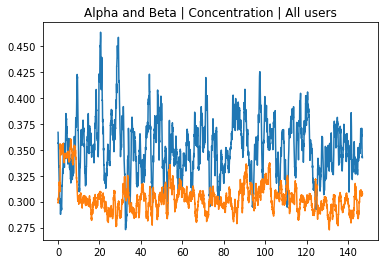

In [10]:
totalConcentrationAlpha = dc1['Sum Alpha'] / 9;
totalConcentrationBeta = dc1['Sum Beta'] / 9;

plt.plot(te_sec, totalConcentrationAlpha)
plt.plot(te_sec, totalConcentrationBeta)
plt.title("Alpha and Beta | Concentration | All users")

plt.show()
# plt.plot(dc1['Sum Alpha'])
# plt.plot(dc1['Sum Beta'])


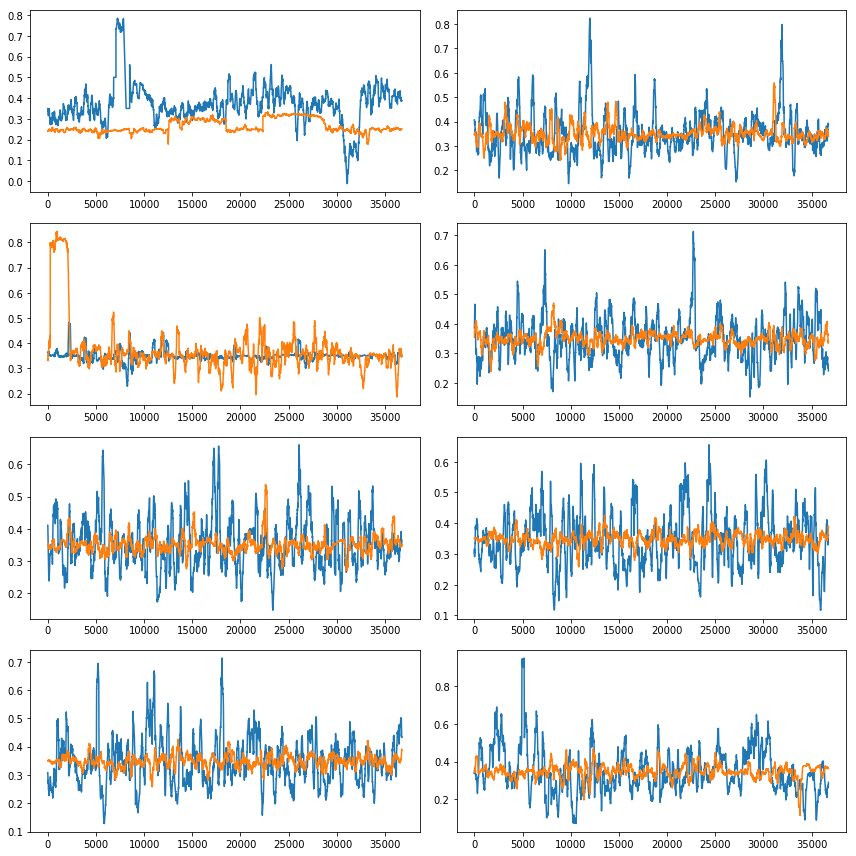

In [11]:
plt.figure(figsize=(12,12))

plt.subplot(4,2,1)
plt.plot(dc1['user 2 alpha'])
plt.plot(dc1['user 2 beta'])
dc_1_am = dc1['user 2 alpha'].mean()
dc_1_bm = dc1['user 2 beta'].mean()

plt.subplot(4,2,2)
plt.plot(dc1['user 6 alpha'])
plt.plot(dc1['user 6 beta'])
dc_2_am = dc1['user 6 alpha'].mean()
dc_2_bm = dc1['user 6 beta'].mean()

plt.subplot(4,2,3)
plt.plot(dc1['user 7 alpha'])
plt.plot(dc1['user 7 beta'])
dc_3_am = dc1['user 7 alpha'].mean()
dc_3_bm = dc1['user 7 beta'].mean()

plt.subplot(4,2,4)
plt.plot(dc1['user 8 alpha'])
plt.plot(dc1['user 8 beta'])
dc_4_am = dc1['user 8 alpha'].mean()
dc_4_bm = dc1['user 8 beta'].mean()

plt.subplot(4,2,5)
plt.plot(dc1['user 9 alpha'])
plt.plot(dc1['user 9 beta'])
dc_5_am = dc1['user 9 alpha'].mean()
dc_5_bm = dc1['user 9 beta'].mean()

plt.subplot(4,2,6)
plt.plot(dc1['user 12 alpha'])
plt.plot(dc1['user 12 beta'])
dc_6_am = dc1['user 12 alpha'].mean()
dc_6_bm = dc1['user 12 beta'].mean()

plt.subplot(4,2,7)
plt.plot(dc1['user 13 alpha'])
plt.plot(dc1['user 13 beta'])
dc_7_am = dc1['user 13 alpha'].mean()
dc_7_bm = dc1['user 13 beta'].mean()

plt.subplot(4,2,8)
plt.plot(dc1['user 16 alpha'])
plt.plot(dc1['user 16 beta'])
dc_8_am = dc1['user 16 alpha'].mean()
dc_8_bm = dc1['user 16 beta'].mean()

# plt.subplot(5,2,9)
# plt.plot(dc1['user 17 alpha'])
# plt.plot(dc1['user 17 beta'])

plt.tight_layout()
plt.show();


### Relaxation Stage

In [12]:
dr1.describe()

,VAR00001,VAR00002,VAR00003,VAR00004,VAR00005,VAR00006,VAR00007,VAR00008,VAR00010,VAR00011,VAR00012,VAR00013,VAR00014,VAR00015,VAR00016,VAR00017,sumAlpha,sumBeta,Alpha,Beta
count,36750.000000,36750.000000,36750.000000,36750.000000,36750.000000,36750.000000,36750.000000,36750.000000,36750.000000,36750.000000,36750.000000,36750.000000,36750.000000,36750.000000,36750.000000,36750.000000,36750.000000,36750.000000,36750.000000,36750.000000
mean,0.429762,0.428670,0.441281,0.353036,0.325746,0.354452,0.349529,0.350130,0.351957,0.350610,0.350233,0.350610,0.361465,0.351184,0.350347,0.350033,2.960321,2.888725,0.370040,0.361091
std,0.194635,0.191631,0.180828,0.030780,0.155078,0.044781,0.080724,0.014338,0.088074,0.019433,0.077487,0.019433,0.094350,0.032171,0.073968,0.015411,0.349722,0.203153,0.043715,0.025394
min,0.158999,0.000000,0.308680,0.218740,0.000000,0.238819,0.154490,0.292536,0.125173,0.259509,0.177504,0.259509,0.111624,0.235621,0.161491,0.293787,2.146420,2.290823,0.268303,0.286353
25%,0.302797,0.340350,0.347382,0.341944,0.255947,0.338573,0.301168,0.342202,0.296270,0.340728,0.296957,0.340728,0.293818,0.333351,0.304209,0.341064,2.705547,2.775917,0.338193,0.346990
50%,0.357109,0.352998,0.351247,0.357691,0.318082,0.352082,0.340350,0.349193,0.347704,0.350236,0.339646,0.350236,0.347526,0.351616,0.342085,0.351090,2.953702,2.817527,0.369212,0.352191
75%,0.457715,0.374623,0.361748,0.367963,0.385509,0.363718,0.383385,0.355814,0.391972,0.359815,0.395350,0.359815,0.416878,0.368031,0.386437,0.359345,3.199021,2.915775,0.399877,0.364472
max,1.114666,0.864099,0.901367,0.485110,1.037929,0.797272,0.823077,0.423664,0.858308,0.439178,0.675772,0.439178,0.785766,0.555311,0.706451,0.410304,4.016205,3.400733,0.502026,0.425092


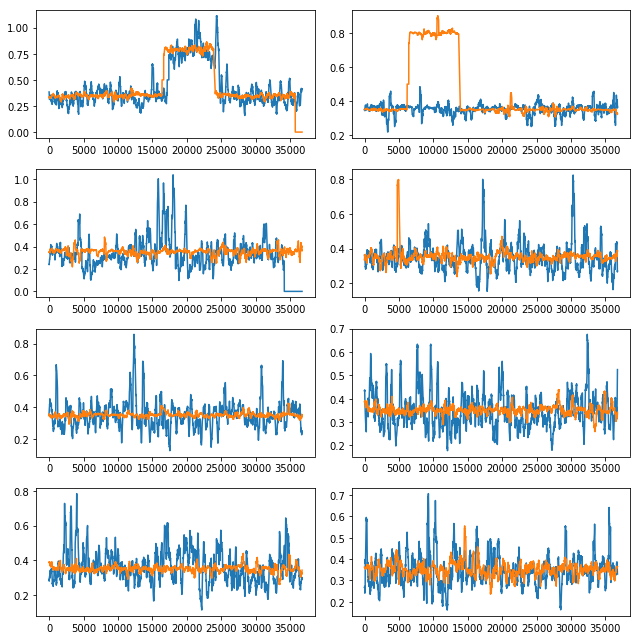

In [13]:
plt.figure(figsize=(9,9))

plt.subplot(4,2,1)
plt.plot(dr1['VAR00001'])
plt.plot(dr1['VAR00002'])
dr_1_am = dr1['VAR00001'].mean()
dr_1_bm = dr1['VAR00002'].mean()

plt.subplot(4,2,2)
plt.plot(dr1['VAR00004'])
plt.plot(dr1['VAR00003'])
dr_2_am = dr1['VAR00004'].mean()
dr_2_bm = dr1['VAR00003'].mean()

plt.subplot(4,2,3)
plt.plot(dr1['VAR00005'])
plt.plot(dr1['VAR00004'])
dr_3_am = dr1['VAR00005'].mean()
dr_3_bm = dr1['VAR00004'].mean()

plt.subplot(4,2,4)
plt.plot(dr1['VAR00007'])
plt.plot(dr1['VAR00006'])
dr_4_am = dr1['VAR00007'].mean()
dr_4_bm = dr1['VAR00006'].mean()

plt.subplot(4,2,5)
plt.plot(dr1['VAR00010'])
plt.plot(dr1['VAR00008'])
dr_5_am = dr1['VAR00010'].mean()
dr_5_bm = dr1['VAR00008'].mean()

plt.subplot(4,2,6)
plt.plot(dr1['VAR00012'])
plt.plot(dr1['VAR00011'])
dr_6_am = dr1['VAR00012'].mean()
dr_6_bm = dr1['VAR00011'].mean()

plt.subplot(4,2,7)
plt.plot(dr1['VAR00014'])
plt.plot(dr1['VAR00013'])
dr_7_am = dr1['VAR00014'].mean()
dr_7_bm = dr1['VAR00013'].mean()

plt.subplot(4,2,8)
plt.plot(dr1['VAR00016'])
plt.plot(dr1['VAR00015'])
dr_8_am = dr1['VAR00016'].mean()
dr_8_bm = dr1['VAR00015'].mean()

plt.tight_layout()
plt.show();


fig=plt.figure(figsize=(18, 16), dpi= 150, facecolor='w', edgecolor='k')


In [14]:
### All users mean alpha perforamnce

all_alpha_Tutorial = (ct_1_am + ct_2_am  + ct_3_am  + ct_4_am  + ct_5_am  + ct_6_am  + ct_7_am + ct_8_am)  / 8
all_beta_Tutorial = (ct_1_bm + ct_2_bm  + ct_3_bm  + ct_4_bm  + ct_5_bm  + ct_6_bm  + ct_7_bm + ct_8_bm)  / 8
all_alpha_Concentration = (dc_1_am + dc_2_am  + dc_3_am  + dc_4_am  + dc_5_am  + dc_6_am  + dc_7_am + dc_8_am)  / 8
all_beta_Concentration = (dc_1_bm + dc_2_bm  + dc_3_bm  + dc_4_bm  + dc_5_bm  + dc_6_bm  + dc_7_bm + dc_8_bm)  / 8
all_alpha_Relaxation = (dr_1_am + dr_2_am  + dr_3_am  + dr_4_am  + dr_5_am  + dr_6_am  + dr_7_am + dr_8_am)  / 8
all_beta_Relaxation = (dr_1_bm + dr_2_bm  + dr_3_bm  + dr_4_bm  + dr_5_bm  + dr_6_bm  + dr_7_bm + dr_8_bm)  / 8

# girls 2,4,7,8
girls_alpha_Tutorial = ( ct_2_am  + ct_4_am +  ct_7_am + ct_8_am ) / 4
girls_beta_Tutorial = ( ct_2_bm  + ct_4_bm +  ct_7_bm + ct_8_bm ) / 4
guys_alpha_Tutorial = ( ct_1_am + ct_3_am + ct_5_am + ct_6_am ) / 4
guys_beta_Tutorial = ( ct_1_bm + ct_3_bm + ct_5_bm + ct_6_bm ) / 4
girls_a_Concentration = ( dc_2_bm  + dc_4_bm +  dc_7_bm + dc_8_bm ) / 4
girls_b_Concentration = ( dc_2_bm  + dc_4_bm +  dc_7_bm + dc_8_bm ) / 4
guys_a_Concentration = ( dc_1_am + dc_3_am + dc_5_am + dc_6_am ) / 4
guys_b_Concentration = ( dc_1_bm + dc_3_bm + dc_5_bm + dc_6_bm ) / 4
girls_a_Relaxation = ( dr_1_am + dr_3_am + dr_5_am + dr_6_am +  dr_1_am ) / 4
girls_b_Relaxation = ( dr_1_bm + dr_3_bm + dr_5_bm + dr_6_bm +  dr_1_bm ) / 4
guys_a_Relaxation = (   dr_2_am  + dr_4_am +  dr_7_am + dr_8_am ) / 4
guys_b_Relaxation = (  dr_2_bm  + dr_4_bm +  dr_7_bm + dr_8_bm ) / 4
# Learners-NonLearners
learners_alpha_Tutorial = ( ct_1_am + ct_6_am +  ct_7_am + ct_8_am  ) / 4
learners_beta_Tutorial = ( ct_1_bm + ct_6_bm +  ct_7_bm + ct_8_bm  ) / 4
non_learners_alpha_Tutorial = ( ct_2_am + ct_3_am + ct_4_am + ct_5_am ) / 4
non_learners_beta_Tutorial = ( ct_2_bm + ct_3_bm + ct_4_bm + ct_5_bm  ) / 4

learners_a_Concentration = ( dc_1_am + dc_6_am +  dc_7_am + dc_8_am) / 4
learners_b_Concentration = ( dc_1_bm + dc_6_bm +  dc_7_bm + dc_8_bm  ) / 4
non_learners_a_Concentration = ( dc_2_am + dc_3_am + dc_4_am + dc_5_am ) / 4
non_learners_b_Concentration = ( dc_2_bm + dc_3_bm + dc_4_bm + dc_5_bm  ) / 4

learners_a_Relaxation = ( dr_1_am + dr_6_am +  dr_7_am + dr_8_am ) / 4
learners_b_Relaxation = ( dr_1_bm + dr_6_bm +  dr_7_bm + dr_8_bm) / 4
non_learners_a_Relaxation = ( dr_2_am + dr_3_am + dr_4_am + dr_5_am) / 4
non_learners_b_Relaxation = ( dr_2_bm + dr_3_bm + dr_4_bm + dr_5_bm ) / 4

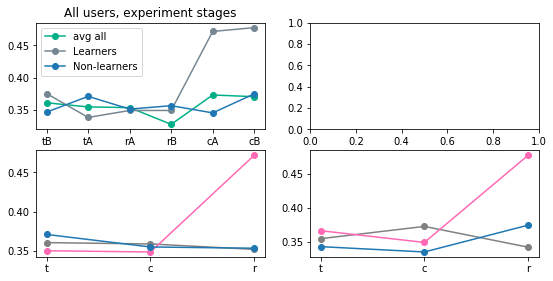

In [15]:
AllUsersID = [1,2,3,4,5,6] #,7,8,9]

LABELS_groups = ["tB", "tA", "rA", "rB", "cA", "cB"]
LABELS = ["avg all", "Learners", "Non-learners"]
bAll = [all_alpha_Tutorial,all_beta_Tutorial, learners_a_Concentration, learners_b_Concentration, learners_a_Relaxation, learners_b_Relaxation ];
bl = [learners_alpha_Tutorial,learners_beta_Tutorial,girls_a_Concentration,girls_b_Concentration,girls_a_Relaxation,girls_b_Relaxation  ]
bln = [non_learners_alpha_Tutorial,non_learners_beta_Tutorial,non_learners_a_Concentration,non_learners_b_Concentration,non_learners_a_Relaxation,non_learners_b_Relaxation ]

plt.figure(figsize=(9,9))

plt.subplot(4,2,1)
plt.plot(AllUsersID, bAll, '-o', color='#00af87')
plt.xticks(AllUsersID, LABELS_groups)
plt.plot(AllUsersID, bl, '-o', color='#758793')
plt.plot(AllUsersID, bln, '-o')
plt.title("All users, experiment stages")
plt.legend(LABELS)

plt.subplot(4,2,2)
GroupedUsersID = [1,2,3] #,5,6] #,7,8,9]

LABELS_groups = ["tB", "tA", "rA", "rB", "cA", "cB"]
LABELS_groups_singles = ["t", "c", "r"]
LABELS = ["avg all", "female", "male"]
bAll_a = [all_alpha_Tutorial, all_alpha_Relaxation, all_alpha_Concentration ];
bAll_b = [all_beta_Tutorial,all_beta_Relaxation, all_beta_Concentration ];
bga_a = [girls_alpha_Tutorial,girls_a_Concentration,girls_a_Relaxation  ]
bga_b = [girls_beta_Tutorial,girls_b_Concentration,girls_b_Relaxation  ]
bgu_a = [guys_alpha_Tutorial,guys_a_Concentration,guys_a_Relaxation ]
bgu_b = [guys_beta_Tutorial,guys_b_Concentration,guys_b_Relaxation ]

# plt.title("All users, experiment stages")
# plt.legend(LABELS)

plt.subplot(4,2,3)
plt.plot(GroupedUsersID, bAll_a, '-o', color='#808080')
plt.xticks(AllUsersID, LABELS_groups_singles)
plt.plot(GroupedUsersID, bga_a, '-o', color='#ff69b4')
plt.plot(GroupedUsersID, bgu_a, '-o')

plt.subplot(4,2,4)
plt.plot(GroupedUsersID, bAll_b, '-o', color='#808080')
plt.xticks(AllUsersID, LABELS_groups_singles)
plt.plot(GroupedUsersID, bga_b, '-o', color='#ff69b4')
plt.plot(GroupedUsersID, bgu_b, '-o')

plt.show()



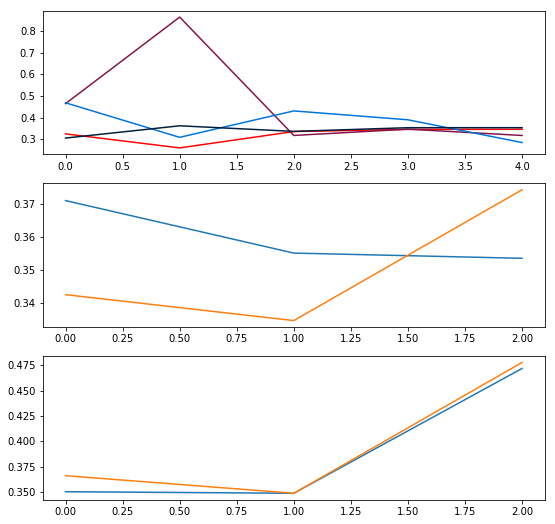

In [21]:
plt.figure(figsize=(9,9))

plt.subplot(3,1,1)

meanRSP_girls_alpha = [
        [ 0.325133 ],[ 0.26031  ], [ 0.335882 ], [ 0.346    ], [ 0.346200] ];

plt.plot(meanRSP_girls_alpha, color='red');
meanRSP_girls_beta = [
    [ 0.464674 ], [ 0.864277 ],[ 0.317855 ],[ 0.346788 ],[0.317855 ]
];
plt.plot(meanRSP_girls_beta, color='#85144b');

meanRSP_guys_alpha = [ [ 0.468652], [ 0.309182], [ 0.431099], [ 0.390164], [ 0.284937]
];
plt.plot(meanRSP_guys_alpha, color='#0074D9');

meanRSP_guys_beta = [ [ 0.305813 ], [ 0.362405 ], [ 0.336622 ], [ 0.353641 ],[ 0.353641 ] ];
plt.plot(meanRSP_guys_beta, color='#001f3f');

plt.subplot(3,1,2)

plt.plot(bgu_a)
plt.plot(bgu_b)

plt.subplot(3,1,3)

plt.plot(bga_a)
plt.plot(bga_b)
plt.show();

In [160]:
# from scipy import * 
# stats.ttest_ind(dr_1_am,dr_1_bm)

abDif = sp.stats.ttest_ind(bAll_a,bAll_b)
# plt.plot(abDif)
abDif

dfab_aa


(0.11545284772889361, 0.91364998094454086)

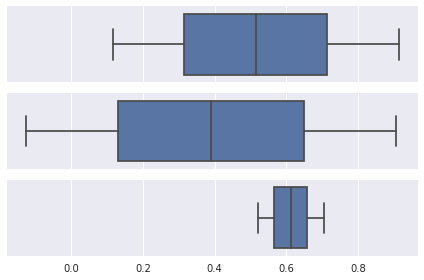

In [164]:
dfab_aa = sp.stats.ttest_ind(bAll_a, bAll_b)
dfa_a = sp.stats.ttest_ind(bga_a, bga_b)
dfa_b = sp.stats.ttest_ind(bgu_a, bgu_b)
paired_difference_exp = pd.DataFrame([dfab_aa, dfa_a, dfa_b])
paired_difference_exp = paired_difference_exp.transpose()
fig, axs = plt.subplots(nrows=3, sharex=True);
sns.boxplot(dfab_aa, ax=axs[0])
# sns.despine(offset=100, trim=True)
sns.boxplot(dfa_a, ax=axs[1])
sns.boxplot(dfa_b, ax=axs[2])

plt.tight_layout()




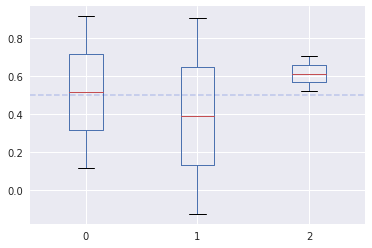

In [179]:
paired_difference_exp.boxplot()
# plt.axhline(0.5)
plt.axhline(0.5, linewidth=0.3, color='#0033cc', linestyle='--')
# plt.set_linestyle('--')

In [142]:
g = sns.PairGrid(titanic, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 size=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

NameError: name 'titanic' is not defined

In [34]:
# dConcent.ix[0, :]
cTutorialAlla = dTutorial.ix[:,20].mean()
cTutorialAllb = dTutorial.ix[:,21].mean()
cTutorialAllb
# dRelax.ix[2,:]

# meanRSP = [
# [0.468652, 0.305813 ],
# [0.309182, 0.362405 ],
# [0.325133, 0.464674 ],
# [0.260310, 0.864277 ],
# [0.431099, 0.336622 ],
# [0.390164, 0.353641 ],
# [0.284937, 0.353641 ],
# [0.335882, 0.317855 ],
# [0.346200, 0.346788 ] ];

# #all sampled users
# print(meanRSP);

# N = 9;
# width = 1/1.5
# x = range(N)

# plt.bar(AllUsersID, meanRSP[2,:]);

# -----------------------------------------------------
# For each level, each group with average of all users
# -----------------------------------------------------

# for x in range(1,8):
    
#     drTotal = dr_ + x + _am = 

0.35365875890118681

# Closer Look at individual users

The paired difference of alpha over betta for each user for each stage of the expriment. 

In [167]:
# from scipy.stats import ttest_1samp, ttest_ind, wilcoxon, mannwhitneyu
# t_stat, p_value = ttest_ind(all_alpha_Tutorial, all_beta_Tutorial)

# lapply(names(testData)[-1],function(x)
#            t.test(as.formula(paste(x,"Label",sep="~")),
#                   data=testData))


In [35]:
#From Wizzard Pro, Mac
# Wilcoxon Singed-Rank Test for Alpha over Beta difference

# Data Files of paired-difference alpha over beta
dTutorialDiff = pd.read_csv('/home/vagrant/notebooks/neurosignalAnalaysis/data/pd/Tutorial_pd__.csv',
                             names = ["Count", "Values","Count", "Values","Count", "Values","Count", "Values","Count", "Values","Count", "Values","Count", "Values","Count", "Values","Count", "Values",])
dTutorialDiff2 = pd.read_csv('/home/vagrant/notebooks/neurosignalAnalaysis/data/pd/Tutorial_pd_.csv')

dRelaxDiff = pd.read_csv('/home/vagrant/notebooks/neurosignalAnalaysis/data/pd/Relaxation_pd_.csv')
dConcentDiff = pd.read_csv('/home/vagrant/notebooks/neurosignalAnalaysis/data/pd/Concentration_pd_.csv')

dTutorialDiff.head()
dRelaxDiff.head()
dConcentDiff.head()

,-0.6,0,-0.6.1,0.1,-0.5,0.2,-0.4,0.3,-0.4.1,0.4,-0.4.2,0.5,-0.4.3,0.6,-0.8,0.7,-0.5.1,0.8
0,-0.58,0,-0.58,0,-0.48,702.0,-0.38,0.0,-0.38,0.0,-0.38,0.0,-0.38,0.0,-0.75,0.0,-0.48,0.0
1,-0.56,0,-0.56,0,-0.46,807.0,-0.36,0.0,-0.36,0.0,-0.36,0.0,-0.36,0.0,-0.70,0.0,-0.46,0.0
2,-0.54,0,-0.54,0,-0.44,231.0,-0.34,0.0,-0.34,0.0,-0.34,0.0,-0.34,0.0,-0.65,0.0,-0.44,0.0
3,-0.52,0,-0.52,0,-0.42,97.0,-0.32,0.0,-0.32,0.0,-0.32,0.0,-0.32,0.0,-0.60,0.0,-0.42,0.0
4,-0.50,0,-0.50,0,-0.40,15.0,-0.30,0.0,-0.30,0.0,-0.30,0.0,-0.30,0.0,-0.55,0.0,-0.40,0.0


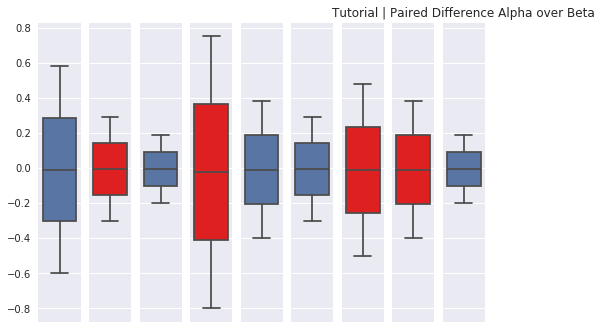

In [32]:
# plt.boxplot(dTutorialDiff.ix[:, :1],dTutorialDiff.ix[:, :2] )
import seaborn as sns
# sns.set_style("dark")
plt.figure(figsize=(15,9))

fig, axs = plt.subplots(ncols=9, sharey=True );
plt.title("Tutorial | Paired Difference Alpha over Beta")
sns.boxplot(x=dTutorialDiff.ix[:, :1], y=dTutorialDiff.ix[:, 1:2], ax=axs[0])
sns.boxplot(x=dTutorialDiff.ix[:, :3], y=dTutorialDiff.ix[:, 3:4], ax=axs[1], color='red')
sns.boxplot(x=dTutorialDiff.ix[:, :5], y=dTutorialDiff.ix[:, 5:6], ax=axs[2])
sns.boxplot(x=dTutorialDiff.ix[:, :7], y=dTutorialDiff.ix[:, 7:8], ax=axs[3], color='red')
sns.boxplot(x=dTutorialDiff.ix[:, :9], y=dTutorialDiff.ix[:, 9:10], ax=axs[4])
sns.boxplot(x=dTutorialDiff.ix[:, :11], y=dTutorialDiff.ix[:, 11:12], ax=axs[5])
sns.boxplot(x=dTutorialDiff.ix[:, :13], y=dTutorialDiff.ix[:, 13:14], ax=axs[6], color='red')
sns.boxplot(x=dTutorialDiff.ix[:, :15], y=dTutorialDiff.ix[:, 15:16], ax=axs[7], color='red')
sns.boxplot(x=dTutorialDiff.ix[:, :17], y=dTutorialDiff.ix[:, 17:18], ax=axs[8]);

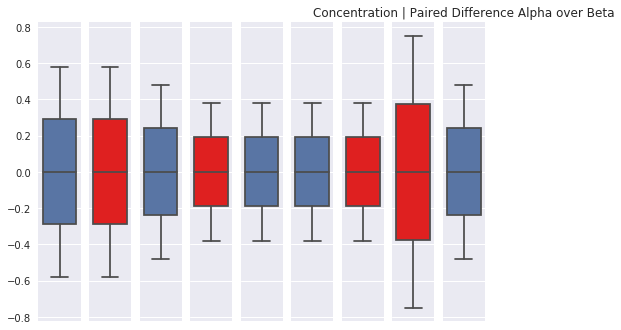

In [26]:
fig, axs = plt.subplots(ncols=9, sharey=True);
plt.title("Concentration | Paired Difference Alpha over Beta")
sns.boxplot(x=dConcentDiff.ix[:, :],   y=dConcentDiff.ix[:, :1],   ax=axs[0])
sns.boxplot(x=dConcentDiff.ix[:, :2],  y=dConcentDiff.ix[:, 2:3],   ax=axs[1], color='red')
sns.boxplot(x=dConcentDiff.ix[:, :4],  y=dConcentDiff.ix[:, 4:5],   ax=axs[2])
sns.boxplot(x=dConcentDiff.ix[:, :6],  y=dConcentDiff.ix[:, 6:7],   ax=axs[3], color='red')
sns.boxplot(x=dConcentDiff.ix[:, :8],  y=dConcentDiff.ix[:, 8:9],  ax=axs[4])
sns.boxplot(x=dConcentDiff.ix[:, :10], y=dConcentDiff.ix[:, 10:11], ax=axs[5])
sns.boxplot(x=dConcentDiff.ix[:, :12], y=dConcentDiff.ix[:, 12:13], ax=axs[6], color='red')
sns.boxplot(x=dConcentDiff.ix[:, :14], y=dConcentDiff.ix[:, 14:15], ax=axs[7], color='red')
sns.boxplot(x=dConcentDiff.ix[:, :16], y=dConcentDiff.ix[:, 16:17], ax=axs[8]);


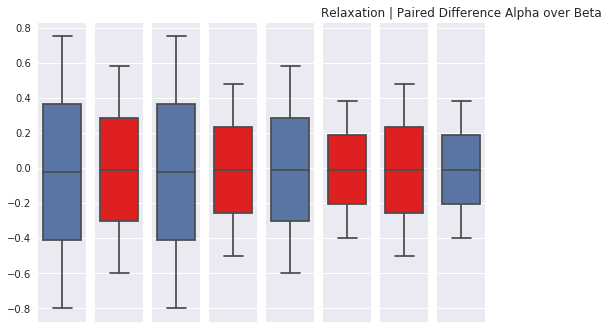

In [27]:
# fig, axs = plt.subplots(ncols=1, sharey=True );
fig, axs = plt.subplots(ncols=8, sharey=True);
plt.title("Relaxation | Paired Difference Alpha over Beta")
sns.boxplot(x=dRelaxDiff.ix[:, :],   y=dRelaxDiff.ix[:, :1],   ax=axs[0])
sns.boxplot(x=dRelaxDiff.ix[:, :2],  y=dRelaxDiff.ix[:, 2:3],   ax=axs[1], color='red')
sns.boxplot(x=dRelaxDiff.ix[:, :4],  y=dRelaxDiff.ix[:, 4:5],   ax=axs[2])
sns.boxplot(x=dRelaxDiff.ix[:, :6],  y=dRelaxDiff.ix[:, 6:7],   ax=axs[3], color='red')
sns.boxplot(x=dRelaxDiff.ix[:, :8],  y=dRelaxDiff.ix[:, 8:9],  ax=axs[4])
sns.boxplot(x=dRelaxDiff.ix[:, :10], y=dRelaxDiff.ix[:, 10:11], ax=axs[5], color='red')
sns.boxplot(x=dRelaxDiff.ix[:, :12], y=dRelaxDiff.ix[:, 12:13], ax=axs[6], color='red')
sns.boxplot(x=dRelaxDiff.ix[:, :14], y=dRelaxDiff.ix[:, 14:15], ax=axs[7]);



In [ ]:
# sns.boxplot(x=dTutorialDiff.ix[:, :5], y=dTutorialDiff.ix[:, 5:6], ax=axs[2], color='red')
# sns.boxplot(x=dTutorialDiff.ix[:, :7], y=dTutorialDiff.ix[:, 7:8], ax=axs[3], color='red')
# sns.boxplot(x=dTutorialDiff.ix[:, :13], y=dTutorialDiff.ix[:, 13:14], ax=axs[6], color='red')
# sns.boxplot(x=dTutorialDiff.ix[:, :15], y=dTutorialDiff.ix[:, 15:16], ax=axs[7], color='red')
# sns.boxplot(x=dConcentDiff.ix[:, :4],  y=dConcentDiff.ix[:, 4:5],   ax=axs[2], color='red')
# sns.boxplot(x=dConcentDiff.ix[:, :6],  y=dConcentDiff.ix[:, 6:7],   ax=axs[3], color='red')
# sns.boxplot(x=dConcentDiff.ix[:, :12], y=dConcentDiff.ix[:, 12:13], ax=axs[6], color='red')
# sns.boxplot(x=dConcentDiff.ix[:, :14], y=dConcentDiff.ix[:, 14:15], ax=axs[7], color='red')
# sns.boxplot(x=dRelaxDiff.ix[:, :4],  y=dRelaxDiff.ix[:, 4:5],   ax=axs[2], color='red')
# sns.boxplot(x=dRelaxDiff.ix[:, :6],  y=dRelaxDiff.ix[:, 6:7],   ax=axs[3], color='red')
# sns.boxplot(x=dRelaxDiff.ix[:, :10], y=dRelaxDiff.ix[:, 10:11], ax=axs[5], color='red')
# sns.boxplot(x=dRelaxDiff.ix[:, :12], y=dRelaxDiff.ix[:, 12:13], ax=axs[6], color='red')

# gfd = {[dTutorialDiff.ix[:, :5]], [dTutorialDiff.ix[:, 5:6]]}

# gfd = {dRelaxDiff.ix[:, :4], dTutorialDiff.ix[5,6], dTutorialDiff.ix[16,17] }


In [ ]:
# dTutDiff__ = {[dTutorialDiff.ix[:, :5], dTutorialDiff.ix[:, 5:6]]}
# g = sns.factorplot(x=dTutorialDiff.ix[:, :5], y=dTutorialDiff.ix[:, 5:6], data=dTutorialDiff,
#                    capsize=.5, palette="YlGnBu_d", size=7, aspect=.75)
# g.despine(left=True)


# Questinnair

In [ ]:
dQuestinnair.head()

In [ ]:
# plt.subplots(ncols=1, sharey=True );
# fig, axs = plt.subplots(ncols=8, sharey=True);
plt.figure(figsize=(13,13))

plt.subplot(2,2,1)
plt.title("Questinnair ")
sns.boxplot(x=dQuestinnair.ix[:, 4:9]);

plt.subplot(2,2,2)
plt.title("Game Score | Interaction ")
sns.boxplot(x=dQuestinnair.ix[:, 12:14]);
# plt.ylim(.1,.63)
